# 🧠 Introduction: Time Series Forecasting of Alcohol Sales and Miles Traveled

"""
This notebook presents a comprehensive time series analysis and forecasting pipeline using historical data of:

📦 Monthly Alcohol Sales  
🚗 Monthly Miles Traveled by Vehicles

The objective is to analyze historical patterns and predict future values using statistical and machine learning models.

🔍 Key Objectives:
1. Visualize historical trends and seasonality.
2. Decompose time series into trend, seasonal, and residual components.
3. Forecast future values using:
   - Holt-Winters Exponential Smoothing
   - ARIMA Model
   - Vector AutoRegression (VAR)
4. Evaluate forecasting accuracy using RMSE.
5. Analyze the correlation between Alcohol Sales and Miles Traveled.
6. Generate forecasts for the next 12–24 months.

📦 Dataset Description:
- Alcohol_Sales.csv: Monthly U.S. alcohol sales (in millions of dollars)
- Miles_Traveled.csv: Monthly miles driven by vehicles in the U.S. (in billions of miles)

This notebook is ideal for exploring time series forecasting, identifying relationships in real-world economic data, and evaluating multivariate models like VAR.
"""


In [28]:
# ✅ Step-by-Step Code for Time Series Forecasting in Jupyter Notebook
# 📌 Step 1: Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Display plots in notebook
%matplotlib inline

In [29]:
# 📌 Step 2: Load the Datasets

alcohol_df = pd.read_csv('Alcohol_Sales.csv', parse_dates=['DATE'], index_col='DATE')
miles_df = pd.read_csv('Miles_Traveled.csv', parse_dates=['DATE'], index_col='DATE')


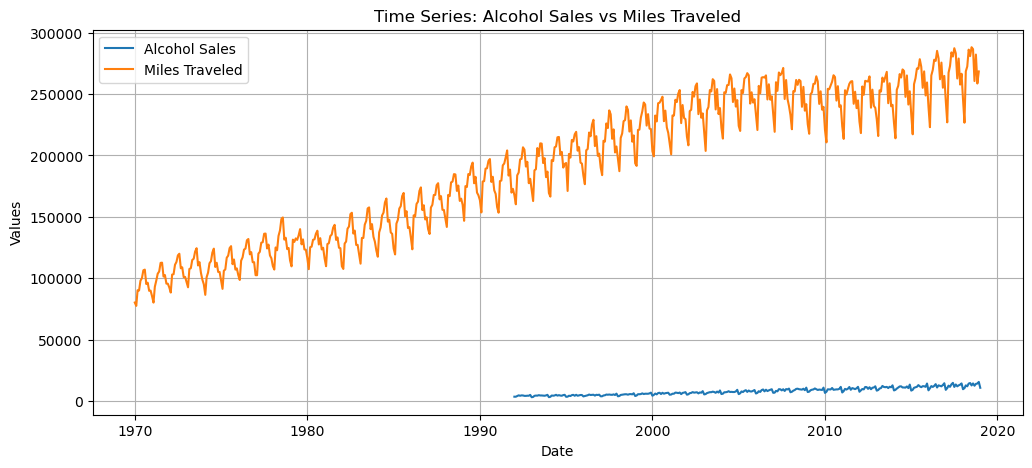

In [30]:
# 📌 Step 3: Visualize the Time Series

plt.figure(figsize=(12, 5))
plt.plot(alcohol_df, label='Alcohol Sales')
plt.plot(miles_df, label='Miles Traveled')
plt.title('Time Series: Alcohol Sales vs Miles Traveled')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

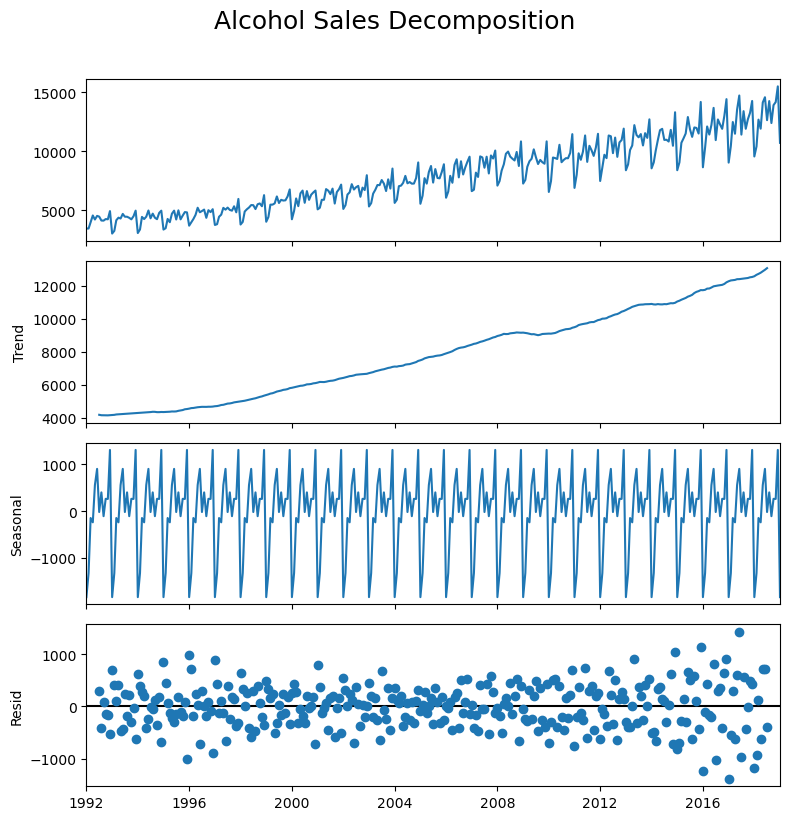

In [31]:
# 📌 Step 4: Decomposition (Seasonal-Trend)

from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose
decomposition = seasonal_decompose(alcohol_df, model='additive', period=12)

# Plot with figure control
fig = decomposition.plot()
fig.set_size_inches(8,8)

# Add title and adjust spacing
plt.suptitle('Alcohol Sales Decomposition', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


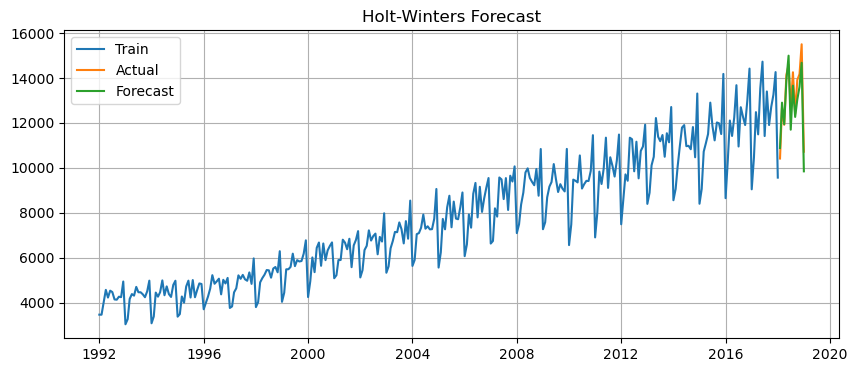

Holt-Winters RMSE: 597.50


In [32]:
# 📌 Step 5: Simple Forecasting with Holt-Winters

# Explicitly set datetime frequency
alcohol_df.index.freq = 'MS'

# Train-Test Split
train = alcohol_df.iloc[:-12]
test = alcohol_df.iloc[-12:]

# Fit Holt-Winters model
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_hw = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
fit_hw = model_hw.fit()

# Forecast
forecast_hw = fit_hw.forecast(steps=12)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(forecast_hw, label='Forecast')
plt.legend()
plt.title('Holt-Winters Forecast')
plt.grid(True)
plt.show()

# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

rmse_hw = np.sqrt(mean_squared_error(test, forecast_hw))
print(f'Holt-Winters RMSE: {rmse_hw:.2f}')


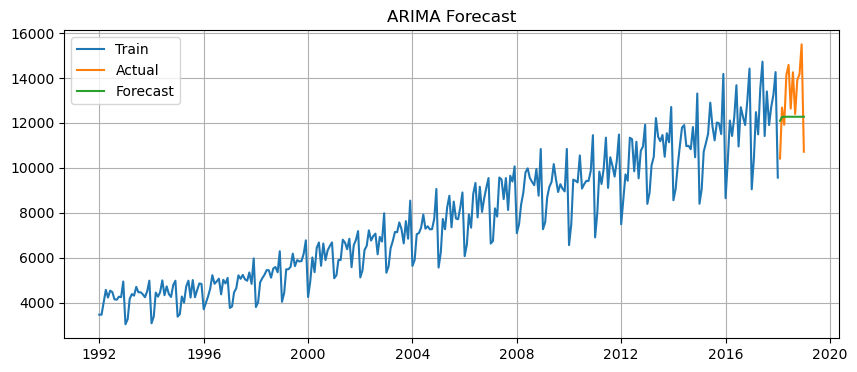

ARIMA RMSE: 1711.08


In [33]:
# 📌 Step 6: ARIMA Forecasting

# Fit ARIMA model
model_arima = ARIMA(train, order=(1,1,1))
fit_arima = model_arima.fit()

# Forecast
forecast_arima = fit_arima.forecast(steps=12)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(forecast_arima, label='Forecast')
plt.legend()
plt.title('ARIMA Forecast')
plt.grid(True)
plt.show()

# RMSE
rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima))
print(f'ARIMA RMSE: {rmse_arima:.2f}')

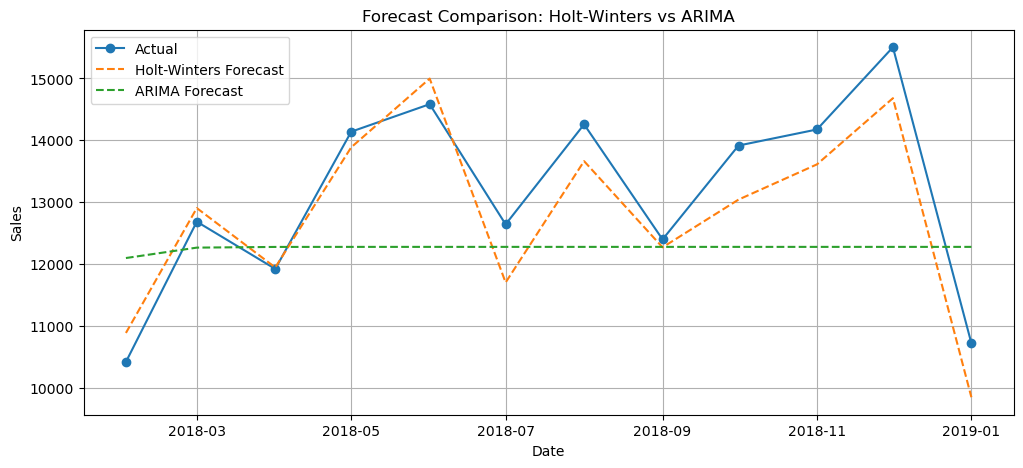

Holt-Winters RMSE: 597.50
ARIMA RMSE: 1711.08


In [34]:
#📌 Step 7: Compare Holt-Winters vs ARIMA Forecasts

# Compare Forecasts Visually
plt.figure(figsize=(12, 5))
plt.plot(test, label='Actual', marker='o')
plt.plot(forecast_hw, label='Holt-Winters Forecast', linestyle='--')
plt.plot(forecast_arima, label='ARIMA Forecast', linestyle='--')
plt.title('Forecast Comparison: Holt-Winters vs ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# Print RMSE comparison
print(f'Holt-Winters RMSE: {rmse_hw:.2f}')
print(f'ARIMA RMSE: {rmse_arima:.2f}')

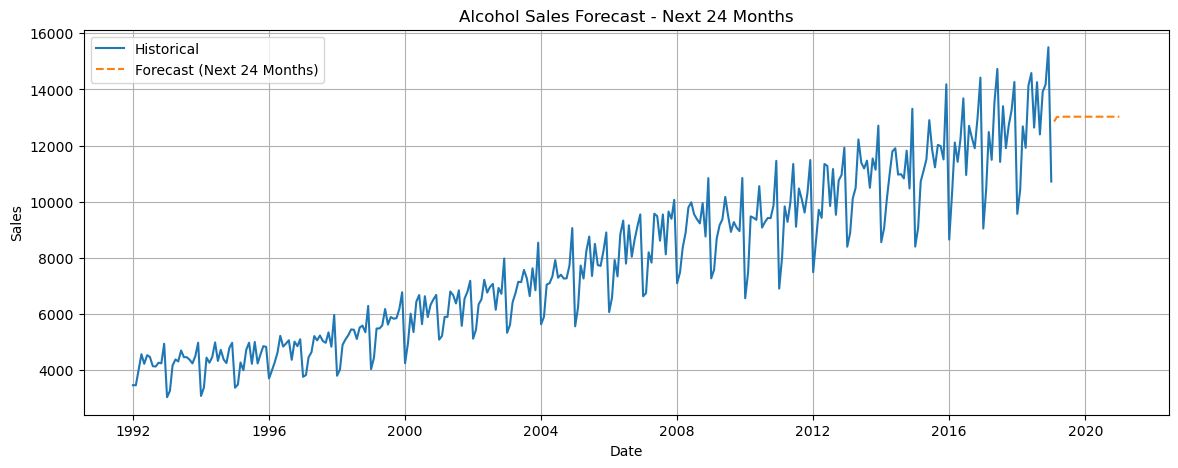

In [35]:
#📌 Step 8: Forecast Future Values (Next 24 Months)

# Refit ARIMA on full data for future forecasting
model_arima_full = ARIMA(alcohol_df, order=(1,1,1))
fit_arima_full = model_arima_full.fit()

# Forecast next 24 months
future_forecast = fit_arima_full.forecast(steps=24)

# Create future index
future_index = pd.date_range(start=alcohol_df.index[-1] + pd.offsets.MonthBegin(1), periods=24, freq='MS')
future_forecast.index = future_index

# Plot
plt.figure(figsize=(14, 5))
plt.plot(alcohol_df, label='Historical')
plt.plot(future_forecast, label='Forecast (Next 24 Months)', linestyle='--')
plt.title('Alcohol Sales Forecast - Next 24 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.show()

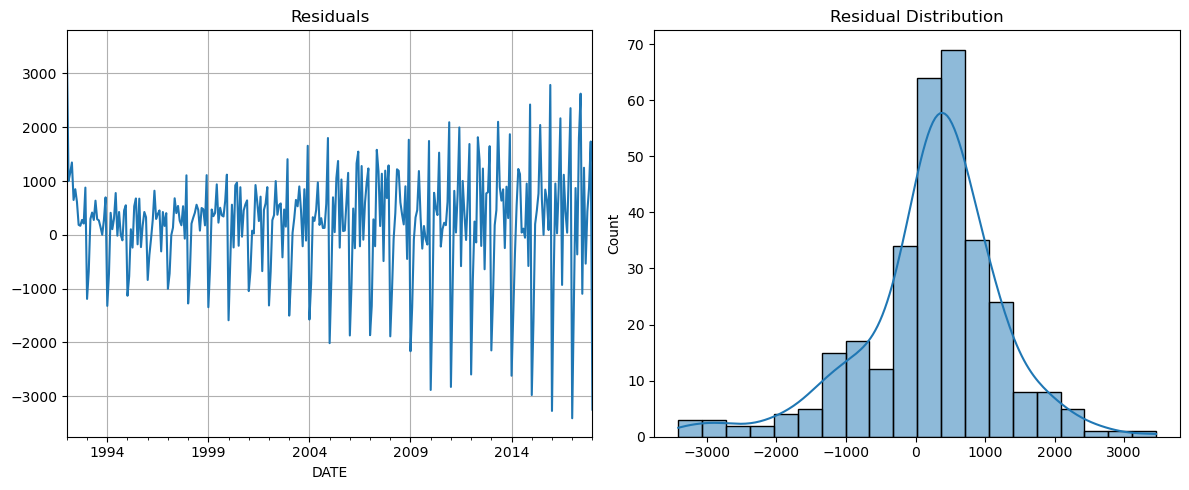

count     313.000000
mean      227.995494
std      1005.179199
min     -3410.631828
25%      -176.408048
50%       327.839256
75%       781.245288
max      3459.000000
dtype: float64


In [36]:
# 📌 Step 9: Residual Analysis (Model Diagnostics)

# Residuals
residuals = fit_arima.resid

# Plot residuals
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
residuals.plot(title='Residuals')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, bins=20)
plt.title('Residual Distribution')

plt.tight_layout()
plt.show()

# Summary stats
print(residuals.describe())

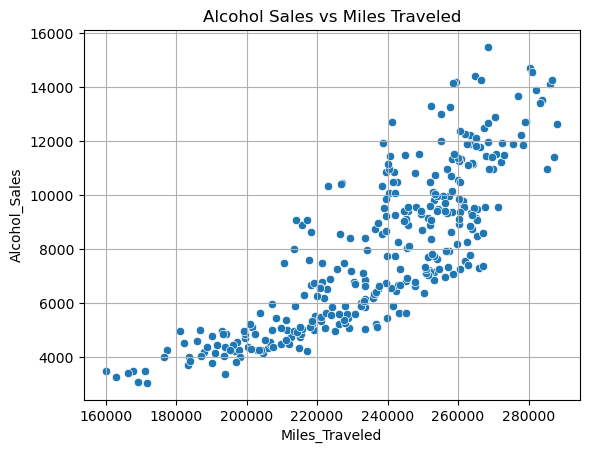

Correlation between Alcohol Sales and Miles Traveled: 0.830


In [37]:
# 📌 Step 10: Correlation with Miles Traveled (Multivariate Outlook)

# Align index (just in case)
combined_df = pd.concat([alcohol_df, miles_df], axis=1)
combined_df.columns = ['Alcohol_Sales', 'Miles_Traveled']

# Drop NaNs
combined_df.dropna(inplace=True)

# Plot correlation
sns.scatterplot(data=combined_df, x='Miles_Traveled', y='Alcohol_Sales')
plt.title('Alcohol Sales vs Miles Traveled')
plt.grid(True)
plt.show()

# Correlation coefficient
correlation = combined_df.corr().iloc[0, 1]
print(f"Correlation between Alcohol Sales and Miles Traveled: {correlation:.3f}")

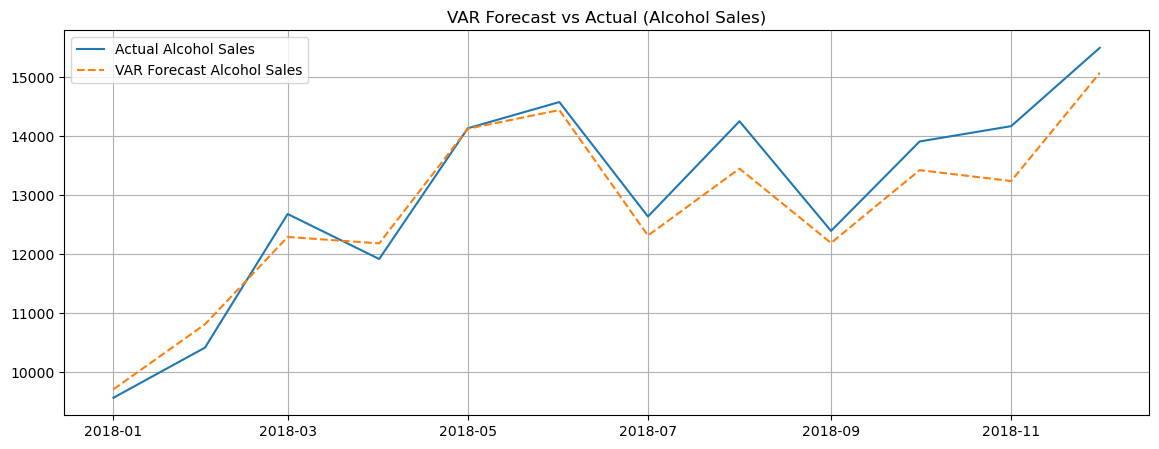

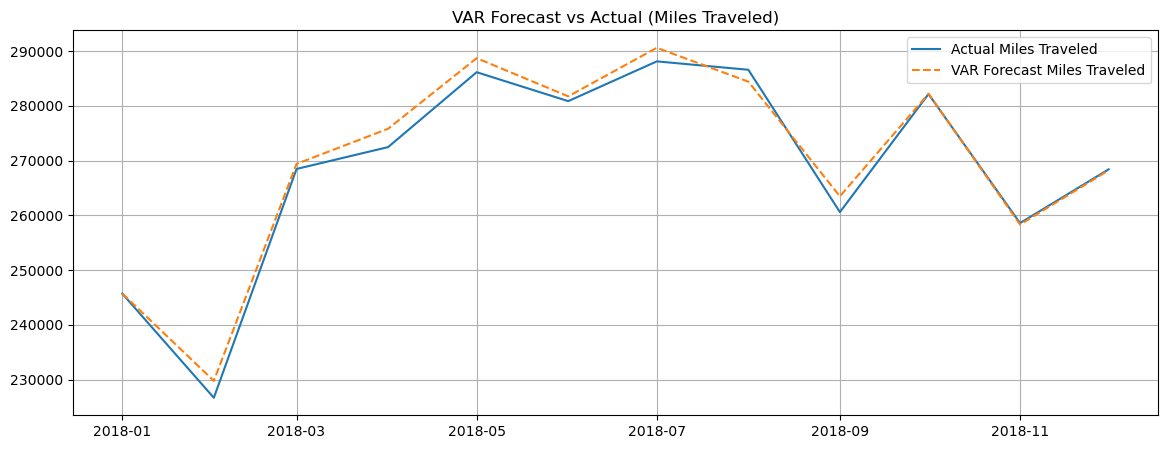

In [38]:
# ✅ Step 11: Multivariate Forecasting Using VAR

from statsmodels.tsa.api import VAR

# Prepare multivariate time series
combined_df = pd.concat([alcohol_df, miles_df], axis=1)
combined_df.columns = ['Alcohol_Sales', 'Miles_Traveled']
combined_df.dropna(inplace=True)  # Drop any missing values
combined_df = combined_df.asfreq('MS')  # Ensure proper monthly frequency

# Train-test split
n_obs = 12  # Forecast horizon (e.g., 12 months)
train_data = combined_df[:-n_obs]
test_data = combined_df[-n_obs:]

# Fit VAR model
model_var = VAR(train_data)
fit_var = model_var.fit(maxlags=15, ic='aic')  # Select lag based on AIC

# Forecast
forecast_input = train_data.values[-fit_var.k_ar:]
forecast_var = fit_var.forecast(y=forecast_input, steps=n_obs)

# Convert forecast to DataFrame
forecast_index = test_data.index
forecast_df = pd.DataFrame(forecast_var, index=forecast_index, columns=train_data.columns)

# Plot Alcohol Sales forecast
plt.figure(figsize=(14, 5))
plt.plot(test_data['Alcohol_Sales'], label='Actual Alcohol Sales')
plt.plot(forecast_df['Alcohol_Sales'], label='VAR Forecast Alcohol Sales', linestyle='--')
plt.title('VAR Forecast vs Actual (Alcohol Sales)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Miles Traveled forecast
plt.figure(figsize=(14, 5))
plt.plot(test_data['Miles_Traveled'], label='Actual Miles Traveled')
plt.plot(forecast_df['Miles_Traveled'], label='VAR Forecast Miles Traveled', linestyle='--')
plt.title('VAR Forecast vs Actual (Miles Traveled)')
plt.legend()
plt.grid(True)
plt.show()

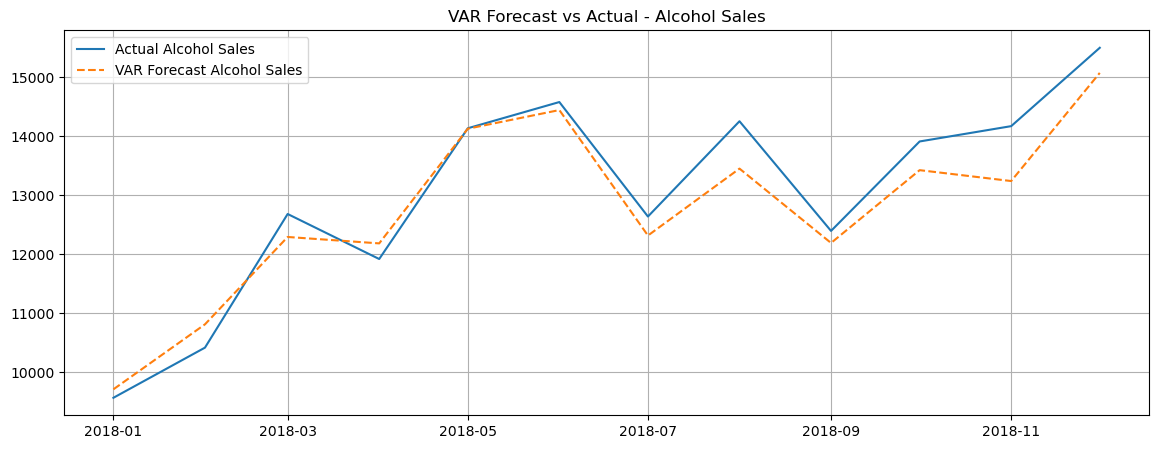

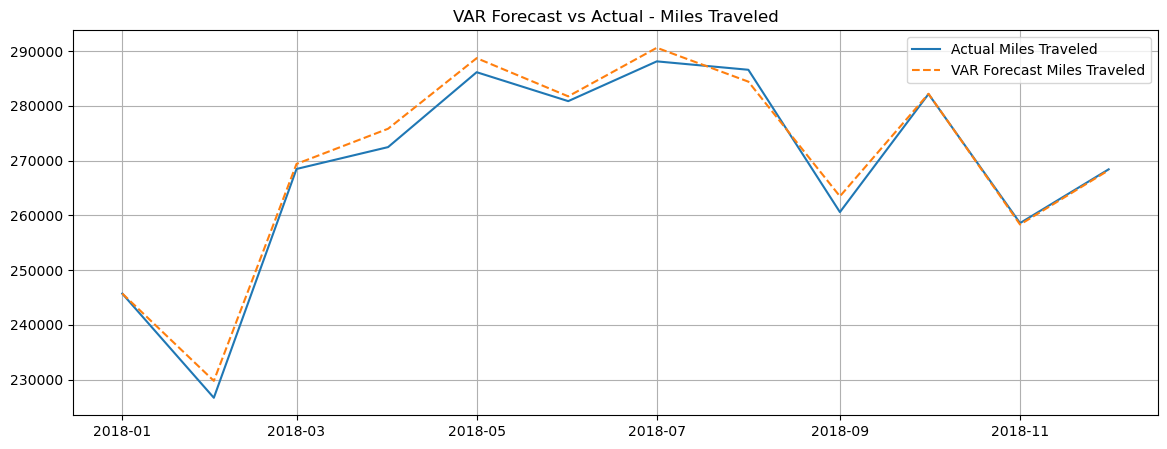

VAR RMSE (Alcohol Sales): 456.14
VAR RMSE (Miles Traveled): 2007.66


In [39]:
# ✅ Final Code: Multivariate VAR Forecast for Alcohol Sales & Miles Traveled

from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
import numpy as np

# Combine both datasets
combined_df = pd.concat([alcohol_df, miles_df], axis=1)
combined_df.columns = ['Alcohol_Sales', 'Miles_Traveled']
combined_df.dropna(inplace=True)
combined_df = combined_df.asfreq('MS')  # Monthly frequency

# Train-test split
n_obs = 12
train = combined_df[:-n_obs]
test = combined_df[-n_obs:]

# Fit VAR model
model = VAR(train)
fit = model.fit(maxlags=15, ic='aic')

# Forecast
lag_order = fit.k_ar
forecast_input = train.values[-lag_order:]
forecast = fit.forecast(y=forecast_input, steps=n_obs)

# Convert forecast to DataFrame
forecast_index = test.index
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=train.columns)

# Plot Alcohol Sales forecast
plt.figure(figsize=(14, 5))
plt.plot(test['Alcohol_Sales'], label='Actual Alcohol Sales')
plt.plot(forecast_df['Alcohol_Sales'], label='VAR Forecast Alcohol Sales', linestyle='--')
plt.title('VAR Forecast vs Actual - Alcohol Sales')
plt.legend()
plt.grid(True)
plt.show()

# Plot Miles Traveled forecast
plt.figure(figsize=(14, 5))
plt.plot(test['Miles_Traveled'], label='Actual Miles Traveled')
plt.plot(forecast_df['Miles_Traveled'], label='VAR Forecast Miles Traveled', linestyle='--')
plt.title('VAR Forecast vs Actual - Miles Traveled')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate RMSE
rmse_alcohol = np.sqrt(mean_squared_error(test['Alcohol_Sales'], forecast_df['Alcohol_Sales']))
rmse_miles = np.sqrt(mean_squared_error(test['Miles_Traveled'], forecast_df['Miles_Traveled']))

print(f'VAR RMSE (Alcohol Sales): {rmse_alcohol:.2f}')
print(f'VAR RMSE (Miles Traveled): {rmse_miles:.2f}')